c:\users\schwe\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\schwe\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


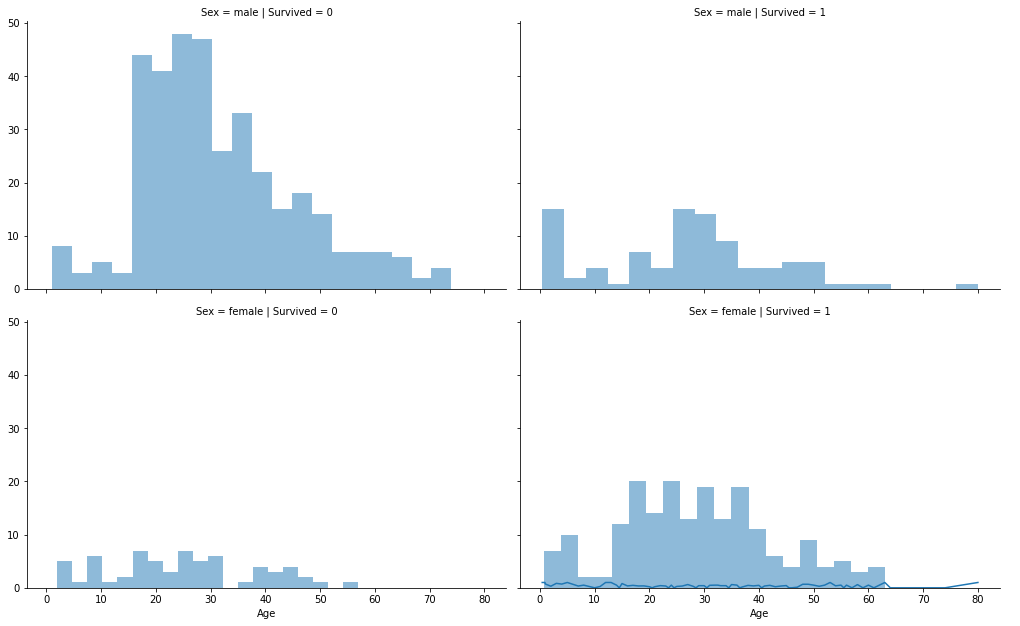

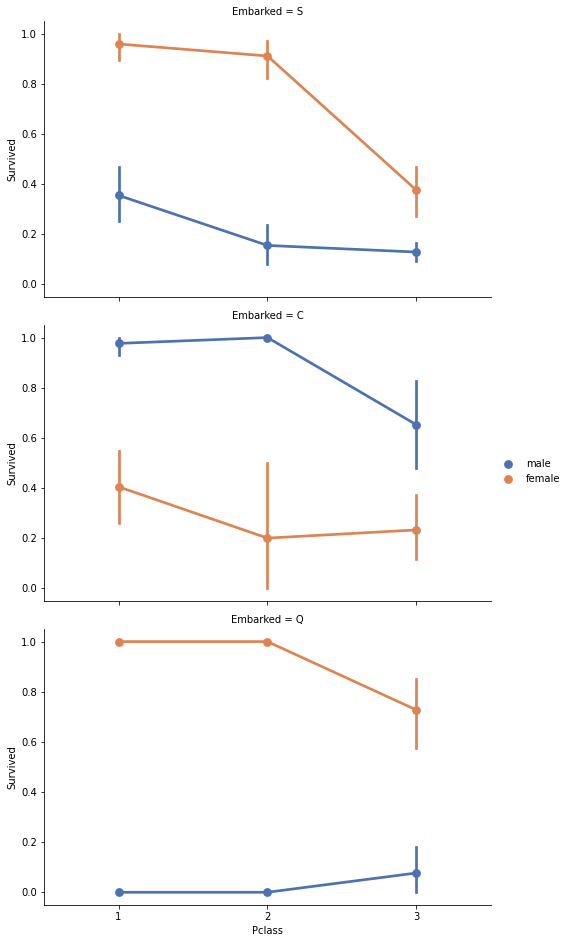

In [8]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

to_read = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# data_Types=to_read.Series

# print(data_Types)

########continuous:PassengerId, Name, Age, ticket, fare, Cabin,
########categorical:Survived, Sex, Pclass,SibSp,Parch, Embarked
########Ordinal:Passenger-Id
########Nominal:Survived,Sex,

###take an overall look at all our data
to_read.head()



###We have 3 categories that we have discovered affected your survival changes. your 'class', your gender, and your age
to_read[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
to_read[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# to_read[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)




###lets plot out survival chance by age 
# grid = sns.FacetGrid(to_read, col='Survived', row='Pclass', height=4.4, aspect=1.6)
# grid.map(plt.hist, 'Age', alpha=.5, bins=20)
# grid.add_legend();




###lets plot out survival chance by age (this time separated by gender)
temp=to_read[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
temp2=to_read[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
temp2
temp
grid = sns.FacetGrid(to_read, col='Survived', row='Sex', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
sns.lineplot(data=temp2, x="Age", y="Survived")


###plot out how your your embarkation method affected your survival chances. (Again, separated by gender)
grid = sns.FacetGrid(to_read, row='Embarked', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()



#####################Step 3
# I have chosen to let the nan values remain. In the statistics I am interested in, they have little to no statistical affects